In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
from itertools import chain

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [4]:
# pip install pandas-profiling

In [5]:
df = pd.read_csv("./data/aac_shelter_outcomes.csv")
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [6]:
df.describe().T

,count,unique,top,freq
age_upon_outcome,78248,46,1 year,14355
animal_id,78256,70855,A706536,11
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
monthyear,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660


Данные по датам конвертируем в даты

In [7]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.datetime = pd.to_datetime(df.datetime)
df.monthyear = pd.to_datetime(df.monthyear)

In [8]:
df.outcome_subtype.unique()

array(['Partner', nan, 'Rabies Risk', 'Suffering', 'Offsite', 'Foster',
       'SCRP', 'In Kennel', 'Aggressive', 'Medical', 'Behavior', 'At Vet',
       'In Foster', 'Enroute', 'In Surgery', 'Possible Theft',
       'Court/Investigation', 'Barn', 'Snr', 'Underage'], dtype=object)

In [9]:
df.outcome_type.unique()

array(['Transfer', 'Adoption', 'Euthanasia', 'Return to Owner', 'Died',
       'Disposal', 'Relocate', 'Missing', nan, 'Rto-Adopt'], dtype=object)

Посмотрим на пустые строки по целевой переменной

In [10]:
df[df.outcome_type.isna() == True]

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
10753,1 year,A671017,Other,Fox Mix,Brown/Black,2013-01-17,2014-01-20 08:27:00,2014-01-20 08:27:00,NaN,NaN,NaN,Unknown
13270,0 years,A674209,Other,Bat Mix,Brown,2014-03-09,2014-03-09 18:15:00,2014-03-09 18:15:00,NaN,NaN,NaN,Unknown
13302,4 weeks,A679066,Other,Rabbit Sh,Brown,2014-04-16,2014-05-16 00:00:00,2014-05-16 00:00:00,NaN,NaN,NaN,Unknown
16951,1 year,A686025,Other,Bat Mix,Brown,2013-08-15,2014-08-16 08:35:00,2014-08-16 08:35:00,NaN,NaN,NaN,Unknown
29214,1 year,A744013,Other,Bat Mix,Black,2016-02-21,2017-02-24 09:00:00,2017-02-24 09:00:00,NaN,NaN,NaN,Unknown
64626,1 month,A755711,Cat,Domestic Shorthair Mix,Black,2017-07-06,2017-08-21 10:09:00,2017-08-21 10:09:00,*Dewey,NaN,NaN,Intact Male
68246,NaN,A737705,Dog,Labrador Retriever Mix,Black/White,2013-11-02,2016-11-19 16:35:00,2016-11-19 16:35:00,*Heddy,NaN,NaN,NaN
69847,1 month,A755715,Cat,Domestic Shorthair Mix,Black Smoke,2017-06-29,2017-08-21 10:09:00,2017-08-21 10:09:00,*Louie,NaN,NaN,Intact Female
72037,1 month,A755716,Cat,Domestic Shorthair Mix,Blue,2017-07-06,2017-08-21 10:09:00,2017-08-21 10:09:00,*Huey,NaN,NaN,Intact Female
76709,10 years,A718046,Dog,Chihuahua Longhair Mix,Cream,2005-12-20,2016-03-26 00:00:00,2016-03-26 00:00:00,Bailey,NaN,NaN,Neutered Male


Тяжело предсказать неизвестное. Удаляем.

In [11]:
df = df[df.outcome_type.isna() == False]

Посмотрим на возраст животных

In [12]:
df.age_upon_outcome.unique()

array(['2 weeks', '1 year', '9 years', '5 months', '4 months', '3 years',
       '1 month', '3 months', '2 years', '2 months', '4 years', '8 years',
       '3 weeks', '8 months', '12 years', '7 years', '5 years', '6 years',
       '5 days', '10 months', '4 weeks', '10 years', '2 days', '6 months',
       '14 years', '11 months', '15 years', '7 months', '13 years',
       '11 years', '16 years', '9 months', '3 days', '6 days', '4 days',
       '5 weeks', '1 week', '1 day', '1 weeks', '0 years', '17 years',
       '20 years', '18 years', '19 years', '22 years', '25 years', nan],
      dtype=object)

Переменную можно перевести в дни. Заодно заменим пропуски нулями

In [13]:
def age_to_days(age_str):
    try:
        splt = age_str.split(" ")
    except AttributeError:
        return 0

    multiplier = 0
    if splt[1] == 'day' or splt[1] == 'days':
         multiplier = 1
    elif splt[1] == 'weeks' or splt[1] == 'week':
         multiplier = 7
    elif splt[1] == 'months' or splt[1] == 'month':
        multiplier = 30
    elif splt[1] == 'years' or splt[1] == 'year':
        multiplier = 365
    return int(splt[0]) * multiplier

In [14]:
df["age_days"] = df.age_upon_outcome.apply(age_to_days)

Разобъем *sex_upon_outcome* на стерелизованность и пол животного 

In [15]:
df.sex_upon_outcome.fillna("Unknown", inplace=True)

In [16]:
def get_castration_gender(sex_upon_outcome):
    if sex_upon_outcome == 'Unknown':
        return('Unknown','Unknown')
    else:
        splt = sex_upon_outcome.split(" ")
        if splt[0] == "Spayed" or splt[0] == "Neutered":
            castration = "Neutered"
        else:
            castration = "Intact"
        
        if splt[1] == "Male":
            gender = "Male"
        else:
            gender = "Female"

        return (castration, gender)

for sex_str in df.sex_upon_outcome.unique():
    print(sex_str, get_castration_gender(sex_str))


Intact Male ('Intact', 'Male')
Spayed Female ('Neutered', 'Female')
Neutered Male ('Neutered', 'Male')
Unknown ('Unknown', 'Unknown')
Intact Female ('Intact', 'Female')


In [17]:
split_gender = pd.DataFrame(df['sex_upon_outcome'].apply(get_castration_gender).values.tolist(), columns=["Castrated", "Gender"])
df = df.join(split_gender)

In [18]:
df

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,age_days,Castrated,Gender
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,14,Intact,Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,365,Neutered,Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,365,Neutered,Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,3285,Neutered,Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,150,Unknown,Unknown
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07 13:06:00,2013-10-07 13:06:00,*Edgar,Partner,Transfer,Intact Male,120,Intact,Male
6,1 year,A693700,Other,Squirrel Mix,Tan,2013-12-13,2014-12-13 12:20:00,2014-12-13 12:20:00,NaN,Suffering,Euthanasia,Unknown,365,Unknown,Unknown
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08 15:55:00,2014-12-08 15:55:00,*Ella,Partner,Transfer,Spayed Female,1095,Neutered,Female
8,1 month,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16,2014-08-14 18:45:00,2014-08-14 18:45:00,Lucy,NaN,Adoption,Intact Female,30,Intact,Female
9,3 months,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26,2014-06-29 17:45:00,2014-06-29 17:45:00,*Frida,Offsite,Adoption,Spayed Female,90,Neutered,Female


In [19]:
columns_to_drop = ["age_upon_outcome","sex_upon_outcome"]
df.drop(columns=columns_to_drop, inplace=True)

In [20]:
# pp.ProfileReport(df)

In [21]:
df.animal_id.unique().shape

(70848,)

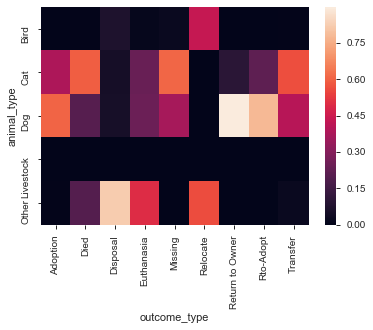

In [22]:
outcome_by_age = df.pivot_table(columns="outcome_type", index="animal_type", values="age_days",aggfunc="count",fill_value=0)
outcome_by_age_pecent = outcome_by_age.apply(lambda x: x / sum(x), axis=0)
sns.heatmap(data=outcome_by_age_pecent)

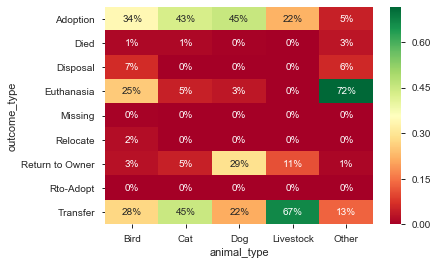

In [23]:
outcome_by_type =(
    df.pivot_table(
        columns="animal_type",
        index="outcome_type", 
        values="age_days",
        aggfunc="count",
        fill_value=0
    ))
outcome_by_type_pecent = outcome_by_type.apply(lambda x: x / sum(x), axis=0)
sns.heatmap(data=outcome_by_type_pecent, annot=True, cmap='RdYlGn', fmt="2.0%")
# outcome_by_type_pecent

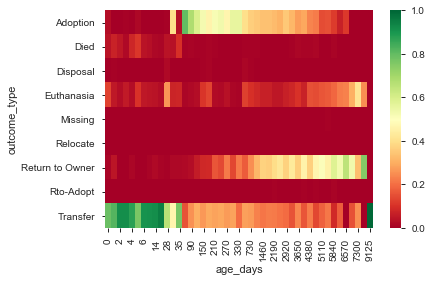

In [24]:
outcome_by_age = df.pivot_table(columns="outcome_type", index="age_days", values="animal_type",aggfunc="count",fill_value=0)
outcome_by_age_percent = outcome_by_age.apply(lambda x: x / sum(x), axis=1)
sns.heatmap(data=outcome_by_age_percent.T, cmap='RdYlGn')

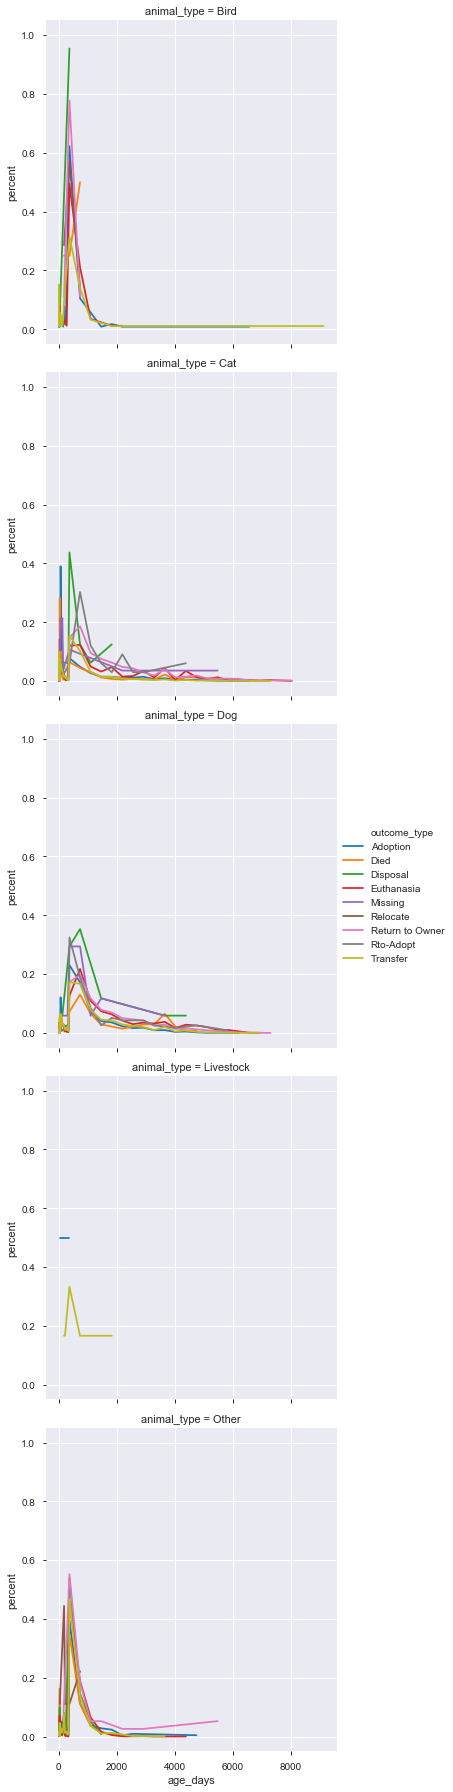

In [25]:
asas = df.groupby(by=["outcome_type","animal_type","age_days"]).agg("count")["animal_id"].to_frame().reset_index()
asas2 = df.groupby(by=["outcome_type","animal_type"]).agg("count")["animal_id"].to_frame()
asas3 = asas.merge(left_on=["outcome_type","animal_type"],right_on=["outcome_type","animal_type"], right=asas2)
asas3.columns = ["outcome_type", "animal_type", "age_days", "count", "group_total"]
asas3["percent"] = asas3["count"] / asas3["group_total"]
asas3
sns.relplot(x="age_days", y="percent", hue="outcome_type", kind="line",row="animal_type", data=asas3)

In [26]:
# meaningfull_columns = ["animal_type","Castrated","Gender","outcome_type"]

In [27]:
# df[meaningfull_columns]

In [28]:
# sns.plot(df[meaningfull_columns], x="Gender", y="outcome_type")

In [29]:
columns = [[n, col_name] for n, col_name in enumerate(df.columns)]
for col in columns:
    print(col)

[0, 'animal_id']
[1, 'animal_type']
[2, 'breed']
[3, 'color']
[4, 'date_of_birth']
[5, 'datetime']
[6, 'monthyear']
[7, 'name']
[8, 'outcome_subtype']
[9, 'outcome_type']
[10, 'age_days']
[11, 'Castrated']
[12, 'Gender']


In [30]:
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.feature_importances_)
print(clf.predict([[0, 0, 0, 0]]))

[0.14205973 0.76664038 0.0282433  0.06305659]
[1]


In [31]:
# # Get dataset with only the first two attributes
# X = pd.get_dummies(df, columns=meaningfull_columns[:-1]).drop(columns=["animal_id","name","outcome_subtype"])
# y = df["outcome_type"]

In [32]:
unique_colors = df.color.unique()
colors = [color.split("/") for color in unique_colors]
single = set(chain.from_iterable([i.split(" ") for i in chain.from_iterable(colors)]))
print(["c_" + el for el in single], len(single))

['c_Brown', 'c_Calico', 'c_Agouti', 'c_Yellow', 'c_Fawn', 'c_Tiger', 'c_Smoke', 'c_Silver', 'c_Gold', 'c_Flame', 'c_Lynx', 'c_Apricot', 'c_Liver', 'c_Green', 'c_Tan', 'c_Brindle', 'c_Blue', 'c_Sable', 'c_Tricolor', 'c_Cream', 'c_Tortie', 'c_Tick', 'c_Ruddy', 'c_Torbie', 'c_Red', 'c_Point', 'c_Pink', 'c_Merle', 'c_Black', 'c_Tabby', 'c_Lilac', 'c_Orange', 'c_White', 'c_Seal', 'c_Buff', 'c_Chocolate', 'c_Gray'] 37


In [33]:
unique_breeds = df.breed.unique()
unique_breeds_wo_mix = [br.replace(" Mix", "") for br in unique_breeds]
breeds = set(chain.from_iterable([breed.split("/") for breed in unique_breeds_wo_mix]))

In [34]:
breeds

{'Abyssinian',
 'Affenpinscher',
 'Afghan Hound',
 'African',
 'Airedale Terrier',
 'Akbash',
 'Akita',
 'Alaskan Husky',
 'Alaskan Malamute',
 'American',
 'American Bulldog',
 'American Curl Shorthair',
 'American Eskimo',
 'American Foxhound',
 'American Pit Bull Terrier',
 'American Sable',
 'American Shorthair',
 'American Staffordshire Terrier',
 'American Wirehair',
 'Anatol Shepherd',
 'Angora',
 'Angora-English',
 'Angora-French',
 'Angora-Satin',
 'Armadillo',
 'Australian Cattle Dog',
 'Australian Kelpie',
 'Australian Shepherd',
 'Australian Terrier',
 'Balinese',
 'Bantam',
 'Barred Rock',
 'Basenji',
 'Basset Hound',
 'Bat',
 'Beagle',
 'Bearded Collie',
 'Beauceron',
 'Bedlington Terr',
 'Belgian Hare',
 'Belgian Malinois',
 'Belgian Sheepdog',
 'Belgian Tervuren',
 'Bengal',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Birman',
 'Black',
 'Black Mouth Cur',
 'Bloodhound',
 'Blue Lacy',
 'Bluebird',
 'Bluetick Hound',
 'Bobcat',
 'Boerboel',
 'Bombay',
 'Border Collie',
 

In [35]:
single_breed = set(chain.from_iterable([i.split(" ") for i in chain.from_iterable(breeds)]))
print(["c_" + el for el in single], len(single))

['c_Brown', 'c_Calico', 'c_Agouti', 'c_Yellow', 'c_Fawn', 'c_Tiger', 'c_Smoke', 'c_Silver', 'c_Gold', 'c_Flame', 'c_Lynx', 'c_Apricot', 'c_Liver', 'c_Green', 'c_Tan', 'c_Brindle', 'c_Blue', 'c_Sable', 'c_Tricolor', 'c_Cream', 'c_Tortie', 'c_Tick', 'c_Ruddy', 'c_Torbie', 'c_Red', 'c_Point', 'c_Pink', 'c_Merle', 'c_Black', 'c_Tabby', 'c_Lilac', 'c_Orange', 'c_White', 'c_Seal', 'c_Buff', 'c_Chocolate', 'c_Gray'] 37


In [36]:
df2 = df.copy(deep=True)

for color_el in list(single):
    df2["c_" + color_el] = df2['color'].str.contains(color_el, regex=False).astype(int)
    
# for breed_el in list(breeds):
#     df2["b_" + breed_el] = df2['breed'].str.contains(breed_el, regex=False).astype(int)
# breed_cols = (["b_" + el for el in breeds])

df2["breed_Mix"] = df2['breed'].str.contains(" Mix", regex=False).astype(int)

df2

,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,...,c_Black,c_Tabby,c_Lilac,c_Orange,c_White,c_Seal,c_Buff,c_Chocolate,c_Gray,breed_Mix
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,...,0,1,0,1,0,0,0,0,0,1
1,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,...,0,0,0,0,1,0,0,0,0,1
2,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,...,0,0,0,0,1,0,0,0,0,0
3,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,...,0,0,0,0,1,0,0,0,0,1
4,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,...,0,0,0,0,0,0,0,0,0,1
5,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07 13:06:00,2013-10-07 13:06:00,*Edgar,Partner,Transfer,...,0,0,0,0,1,0,0,0,0,1
6,A693700,Other,Squirrel Mix,Tan,2013-12-13,2014-12-13 12:20:00,2014-12-13 12:20:00,NaN,Suffering,Euthanasia,...,0,0,0,0,0,0,0,0,0,1
7,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08 15:55:00,2014-12-08 15:55:00,*Ella,Partner,Transfer,...,0,0,0,0,0,0,0,0,0,1
8,A685067,Cat,Domestic Shorthair Mix,Blue Tabby/White,2014-06-16,2014-08-14 18:45:00,2014-08-14 18:45:00,Lucy,NaN,Adoption,...,0,1,0,0,1,0,0,0,0,1
9,A678580,Cat,Domestic Shorthair Mix,White/Black,2014-03-26,2014-06-29 17:45:00,2014-06-29 17:45:00,*Frida,Offsite,Adoption,...,1,0,0,0,1,0,0,0,0,1


In [37]:
# df2[breed_cols].head(5)

In [38]:
# df2.to_clipboard()

In [39]:
cols_to_exclude = ["animal_id", "breed", "color", "name", "outcome_subtype"]
cols_to_dummies = ["animal_type", "Castrated", "Gender"]
cols_to_labelEncode = ["outcome_type"]
cols_to_MinMax = ["date_of_birth", "datetime", "monthyear"]

In [40]:
df3 = pd.get_dummies(df2, columns=cols_to_dummies).drop(cols_to_exclude, axis=1)

In [41]:
minMax = MinMaxScaler()
df3[cols_to_MinMax] = minMax.fit_transform(df3[cols_to_MinMax])

In [42]:
list(df3.columns)

['date_of_birth',
 'datetime',
 'monthyear',
 'outcome_type',
 'age_days',
 'c_Brown',
 'c_Calico',
 'c_Agouti',
 'c_Yellow',
 'c_Fawn',
 'c_Tiger',
 'c_Smoke',
 'c_Silver',
 'c_Gold',
 'c_Flame',
 'c_Lynx',
 'c_Apricot',
 'c_Liver',
 'c_Green',
 'c_Tan',
 'c_Brindle',
 'c_Blue',
 'c_Sable',
 'c_Tricolor',
 'c_Cream',
 'c_Tortie',
 'c_Tick',
 'c_Ruddy',
 'c_Torbie',
 'c_Red',
 'c_Point',
 'c_Pink',
 'c_Merle',
 'c_Black',
 'c_Tabby',
 'c_Lilac',
 'c_Orange',
 'c_White',
 'c_Seal',
 'c_Buff',
 'c_Chocolate',
 'c_Gray',
 'breed_Mix',
 'animal_type_Bird',
 'animal_type_Cat',
 'animal_type_Dog',
 'animal_type_Livestock',
 'animal_type_Other',
 'Castrated_Intact',
 'Castrated_Neutered',
 'Castrated_Unknown',
 'Gender_Female',
 'Gender_Male',
 'Gender_Unknown']

In [43]:
train_columns = [x for x in df3.columns if x != "outcome_type"]

pca_components = 15
pca = PCA(n_components=pca_components, whiten=False)
# pca = PCA(n_components = 'mle')
# pca.fit_transform(df3[train_columns])
# pca_components = pca.n_features()
pca_names = ["v" + str(n) for n in range(1,pca_components+1)]
# # pca_names

data = (
    pd.DataFrame(
        pca.fit_transform(np.array(df3[train_columns])),
        index=df3.index,
        columns=pca_names )
    )
data.head()

# pd.DataFrame(column_trans.fit_transform(df2), index=df2.index, columns=df2.columns)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15
0,-763.924987,1.229984,-0.657223,0.821499,0.037237,-0.012101,-0.555527,0.401901,0.356717,-0.090217,-0.489902,-0.304419,-0.536295,0.247369,-0.332786
1,-412.924713,-0.641648,0.710818,-0.416311,0.889452,-0.153591,0.038857,-0.276102,0.600246,-0.402433,0.165449,0.069680,0.015680,-0.081588,0.052949
2,-412.924686,-0.834773,-0.694371,-0.292526,0.322166,-0.446421,0.000628,0.510475,0.599486,0.683384,0.237383,-0.454465,0.609115,0.266094,-0.065147
3,2507.075278,-0.292501,-0.695584,-0.316876,0.237270,-0.518993,0.052270,0.254578,0.401993,-0.245304,0.184288,0.007061,-0.207764,0.002376,0.003832
4,-627.924873,0.264012,0.089263,0.764220,0.408876,1.039396,1.340387,-0.070294,0.514023,-0.133473,0.575445,0.602277,-0.165702,0.475653,-0.017022


In [44]:
labelEncoder = LabelEncoder()
# y = labelEncoder.fit_transform(df3["outcome_type"])
y = df3["outcome_type"]
y

0               Transfer
1               Transfer
2               Adoption
3               Transfer
4             Euthanasia
5               Transfer
6             Euthanasia
7               Transfer
8               Adoption
9               Adoption
10       Return to Owner
11              Transfer
12              Adoption
13       Return to Owner
14       Return to Owner
15              Transfer
16              Transfer
17              Transfer
18              Adoption
19              Adoption
20              Transfer
21              Adoption
22              Adoption
23              Adoption
24              Transfer
25              Adoption
26              Transfer
27              Adoption
28              Transfer
29              Transfer
              ...       
78226    Return to Owner
78227           Adoption
78228           Adoption
78229           Adoption
78230           Adoption
78231           Adoption
78232           Adoption
78233           Transfer
78234           Transfer


In [45]:
y_other = y.to_frame()
y_other[y_other["outcome_type"].isin(["Transfer", "Adoption"]) == False] = "Other"
y_other

,outcome_type
0,Transfer
1,Transfer
2,Adoption
3,Transfer
4,Other
5,Transfer
6,Other
7,Transfer
8,Adoption
9,Adoption


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state = 42)

No handles with labels found to put in legend.


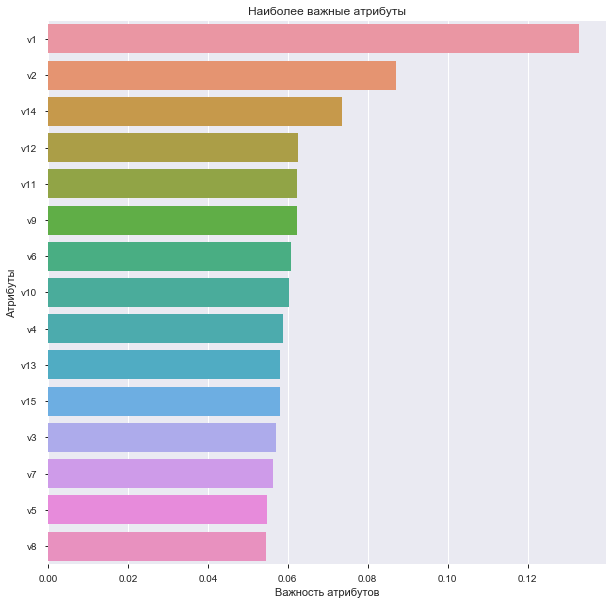

In [47]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [48]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

       Adoption       0.57      0.63      0.60      6599
           Died       0.12      0.05      0.07       135
       Disposal       0.23      0.17      0.20        52
     Euthanasia       0.53      0.45      0.49      1218
        Missing       0.00      0.00      0.00         9
       Relocate       0.00      0.00      0.00         5
Return to Owner       0.39      0.37      0.38      2888
      Rto-Adopt       0.04      0.03      0.04        33
       Transfer       0.53      0.50      0.52      4710

       accuracy                           0.52     15649
      macro avg       0.27      0.25      0.25     15649
   weighted avg       0.52      0.52      0.52     15649



0.5226532046776152

In [49]:
# list(labelEncoder.classes_)

In [50]:
# df2.outcome_type.unique()

In [51]:
# df2["outcome"] = df2["outcome_type"].apply(LabelEncoder().fit_transform)

In [52]:
# OneHotEncoder().fit_transform(df2["outcome_type"].reshape(-1, 1))

In [53]:
# y

In [54]:
# X

In [55]:
# # Split the dataset into a training and a testing set
# # Test set will be the 25% taken randomly
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# print (X_train.shape, y_train.shape)
# # Standarize the features
# # Feature Scaling
# #For each feature, calculate the average, subtract the mean
# #value from the feature value, and divide the result by their standard deviation. After
# #scaling, each feature will have a zero average, with a standard deviation of one.
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

# X_test = scaler.transform(X_test)

In [56]:
columns_to_observe = ([
     'date_of_birth',
     'datetime',
     'monthyear',
     'age_days',
     'breed_Mix',
     'animal_type_Bird',
     'animal_type_Cat',
     'animal_type_Dog',
     'animal_type_Livestock',
     'animal_type_Other',
     'Castrated_Intact',
     'Castrated_Neutered',
     'Castrated_Unknown',
     'Gender_Female',
     'Gender_Male',
     'Gender_Unknown'
    ])

In [57]:
train_columns = columns_to_observe

pca_components = 5
pca = PCA(n_components=pca_components, whiten=False)
pca_names = ["v" + str(n) for n in range(1,pca_components+1)]

data = (
    pd.DataFrame(
        pca.fit_transform(np.array(df3[train_columns])),
        index=df3.index,
        columns=pca_names )
    )
X = data
data.head()

,v1,v2,v3,v4,v5
0,-763.924934,-0.308877,1.085842,0.761114,-0.482272
1,-412.924720,0.461151,-0.881720,-0.314132,-0.086309
2,-412.924695,-0.935101,-0.607398,-0.172805,-0.038435
3,2507.075265,-0.746275,-0.039958,-0.283325,-0.041298
4,-627.924869,0.167154,0.223212,0.737946,1.469637


In [58]:
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print (X_train.shape, y_train.shape)
# Standarize the features
# Feature Scaling
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation. After
#scaling, each feature will have a zero average, with a standard deviation of one.
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

# X_test = scaler.transform(X_test)

(58683, 5) (58683,)


In [59]:
X_train

,v1,v2,v3,v4,v5
35279,-627.924731,-0.882170,-0.440634,-0.236646,0.016295
45625,-717.924926,0.855246,0.380111,-0.651275,-0.029228
75781,682.075245,0.694476,-0.433337,0.954752,-0.412350
1738,-47.924918,-0.457137,0.899598,-0.559245,-0.073772
17285,3237.075290,-0.772104,-0.118551,-0.245035,-0.021037
21700,682.075150,0.718963,-0.075772,-0.481215,0.026590
11377,-47.924722,0.478368,-0.828537,-0.324813,-0.068226
5394,-412.924722,-0.876292,-0.429245,-0.226995,-0.048337
64303,2507.075243,-0.563088,0.255999,1.011794,-0.394092
20044,-412.924844,-0.668423,0.225170,-0.368520,0.040979


No handles with labels found to put in legend.


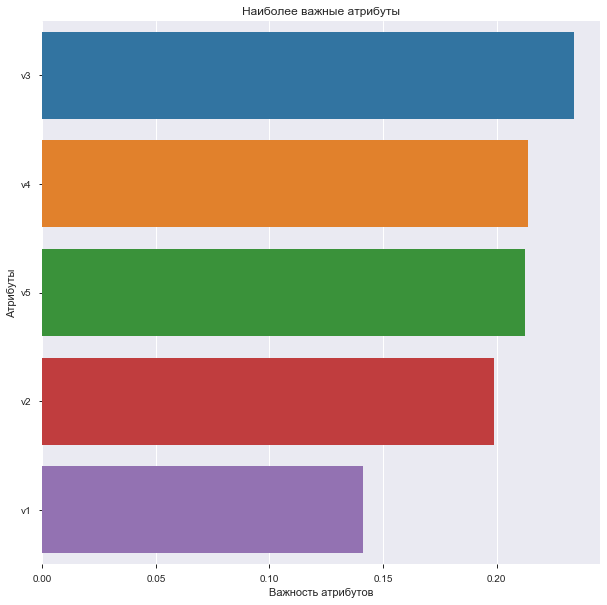

In [60]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [61]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

                 precision    recall  f1-score   support

       Adoption       0.59      0.60      0.60      8260
           Died       0.07      0.06      0.06       172
       Disposal       0.19      0.22      0.21        72
     Euthanasia       0.45      0.42      0.43      1527
        Missing       0.00      0.00      0.00        12
       Relocate       0.00      0.00      0.00         5
Return to Owner       0.36      0.35      0.36      3597
      Rto-Adopt       0.04      0.03      0.03        40
       Transfer       0.52      0.53      0.52      5876

       accuracy                           0.51     19561
      macro avg       0.25      0.25      0.25     19561
   weighted avg       0.51      0.51      0.51     19561



0.5122437503195133

In [88]:
train_columns = columns_to_observe

pca_components = 5
pca = PCA(n_components=pca_components, whiten=False)
pca_names = ["v" + str(n) for n in range(1,pca_components+1)]

data = df3[train_columns]
X = data
data.head()

,date_of_birth,datetime,monthyear,age_days,breed_Mix,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,Castrated_Intact,Castrated_Neutered,Castrated_Unknown,Gender_Female,Gender_Male,Gender_Unknown
0,0.866786,0.185733,0.185733,14,1,0,1,0,0,0,1,0,0,0,1,0
1,0.802860,0.023413,0.023413,365,1,0,0,1,0,0,0,1,0,1,0,0
2,0.818105,0.154761,0.154761,365,0,0,0,1,0,0,0,1,0,0,1,0
3,0.517506,0.162374,0.162374,3285,1,0,0,1,0,0,0,1,0,0,1,0
4,0.847755,0.176213,0.176213,150,1,0,0,0,0,1,0,0,1,0,0,1


In [89]:

# Standarize the features
# Feature Scaling
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation. After
#scaling, each feature will have a zero average, with a standard deviation of one.
scaler = StandardScaler().fit(X)
X_scaled= pd.DataFrame(scaler.transform(X), columns = X.columns, index = X.index)
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_other, test_size=0.25, random_state=42)
print (X_train.shape, y_train.shape)

# X_test = scaler.transform(X_test)

(58683, 16) (58683, 1)


In [90]:
X_train.head()

,date_of_birth,datetime,monthyear,age_days,breed_Mix,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,Castrated_Intact,Castrated_Neutered,Castrated_Unknown,Gender_Female,Gender_Male,Gender_Unknown
35279,1.094219,1.414453,1.414453,-0.593987,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762
45625,0.826703,0.475509,0.475509,-0.679123,0.433568,-0.065475,1.288271,-1.140565,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,1.13080,-0.955075,-0.302762
75781,-0.101030,1.180238,1.180238,0.645211,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,1.785428,-1.448037,-0.302762,1.13080,-0.955075,-0.302762
1738,-0.555464,-1.544320,-1.544320,-0.045335,0.433568,-0.065475,1.288271,-1.140565,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762
17285,-3.549588,-1.369350,-1.369350,3.062120,-2.306444,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762


In [91]:
y_train.head()

,outcome_type
35279,Adoption
45625,Adoption
75781,Adoption
1738,Transfer
17285,Other


C:\Users\Gorelov\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
No handles with labels found to put in legend.


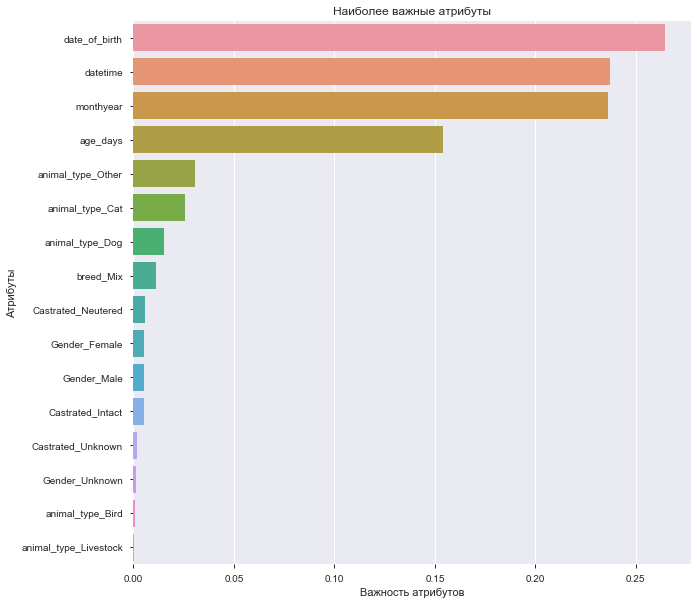

In [66]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [67]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

    Adoption       0.62      0.67      0.64      8260
       Other       0.53      0.51      0.52      5425
    Transfer       0.59      0.54      0.56      5876

    accuracy                           0.59     19561
   macro avg       0.58      0.57      0.57     19561
weighted avg       0.58      0.59      0.58     19561



0.5859618628904453

In [68]:
from sklearn import svm

In [69]:
model2 = svm.LinearSVC() # (kernel="linear", C = 1.0) 
model2.fit(X_train, y_train)

C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [70]:
# X_test

In [71]:
model2_pred = model2.predict(X_test)
print(classification_report(y_test, model2_pred))
model2.score(X_test, y_test)

              precision    recall  f1-score   support

    Adoption       0.49      0.72      0.58      8260
       Other       0.59      0.40      0.48      5425
    Transfer       0.50      0.32      0.39      5876

    accuracy                           0.51     19561
   macro avg       0.53      0.48      0.49     19561
weighted avg       0.52      0.51      0.50     19561



0.5121926281887429

In [72]:
model3 = svm.LinearSVC() # (kernel="linear", C = 1.0) 
model3.fit(X_train, y_train)

C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [73]:
# X_test

In [74]:
model2_pred = model2.predict(X_test)
print(classification_report(y_test, model2_pred))
model2.score(X_test, y_test)

              precision    recall  f1-score   support

    Adoption       0.49      0.72      0.58      8260
       Other       0.59      0.40      0.48      5425
    Transfer       0.50      0.32      0.39      5876

    accuracy                           0.51     19561
   macro avg       0.53      0.48      0.49     19561
weighted avg       0.52      0.51      0.50     19561



0.5121926281887429

In [75]:
columns_to_observe2 = ([
     'date_of_birth',
#      'datetime',
#      'monthyear',
     'age_days',
     'breed_Mix',
#      'animal_type_Bird',
     'animal_type_Cat',
     'animal_type_Dog',
#      'animal_type_Livestock',
#      'animal_type_Other',
#      'Castrated_Intact',
#      'Castrated_Neutered',
#      'Castrated_Unknown',
     'Gender_Female',
     'Gender_Male',
#      'Gender_Unknown'
    ])

In [76]:
train_columns = columns_to_observe2

pca_components = 10
pca = PCA(n_components=pca_components, whiten=False)
pca_names = ["v" + str(n) for n in range(1,pca_components+1)]
    
data = (
    pd.DataFrame(
        pca.fit_transform(StandardScaler().fit_transform(df3[train_columns])),
        index=df3.index,
        columns=pca_names )
    )
X = data
data.head()

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'

In [77]:
data = df3[train_columns]

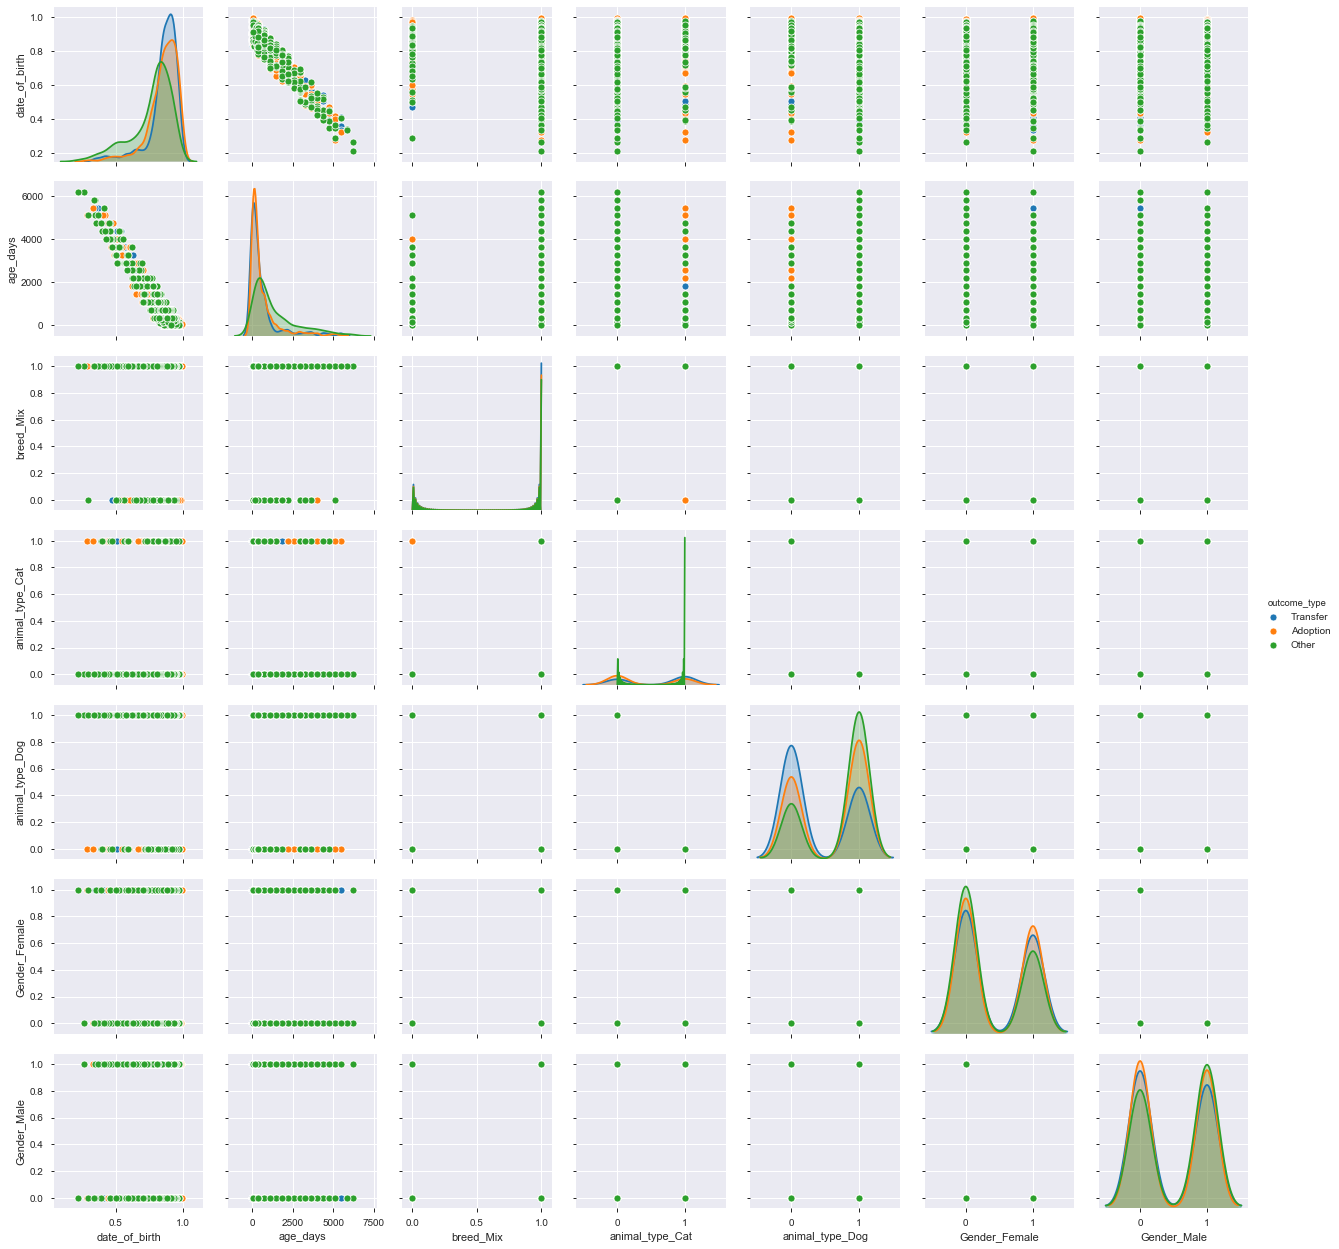

In [78]:
sns.pairplot(data.join(y_other).sample(n=1000), hue="outcome_type")

In [79]:
# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y_other, test_size=0.25, random_state=42)
print (X_train.shape, y_train.shape)
# Standarize the features
# Feature Scaling
#For each feature, calculate the average, subtract the mean
#value from the feature value, and divide the result by their standard deviation. After
#scaling, each feature will have a zero average, with a standard deviation of one.
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

# X_test = scaler.transform(X_test)

(58683, 16) (58683, 1)


In [ ]:
# sc = df3[train_columns].join(y_other)[["age_days","outcome_type"]].reset_index().pivot_table(index="age_days", columns="outcome_type", values="index", aggfunc="count", fill_value=0)[["Adoption","Transfer","Other"]].reset_index()
# sc
sc = df3[train_columns].join(y_other)[["age_days","outcome_type"]].reset_index().groupby(by=["age_days","outcome_type"]).agg("count").reset_index()
# sc
sns.relplot(x="age_days", y="index", row="outcome_type", data=sc)


In [80]:
import os
import xgboost as xgb
import graphviz

os.environ["PATH"] += os.pathsep + 'C:\\Users\\Gorelov\\Anaconda3\\Library\\bin\\graphviz\\'

In [92]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Gorelov\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoostError: [21:28:54] C:\Jenkins\workspace\xgboost-win64_release_0.90\src\metric\rank_metric.cc:150: Check failed: preds.Size() == info.labels_.Size() (58683 vs. 19561) : label size predict size not match

In [93]:
X_test

,date_of_birth,datetime,monthyear,age_days,breed_Mix,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,Castrated_Intact,Castrated_Neutered,Castrated_Unknown,Gender_Female,Gender_Male,Gender_Unknown
59807,0.576335,0.802522,0.802522,-0.390607,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,1.785428,-1.448037,-0.302762,1.13080,-0.955075,-0.302762
43934,0.680940,0.314396,0.314396,-0.593987,0.433568,-0.065475,1.288271,-1.140565,-0.010726,-0.239481,-0.560090,-1.448037,3.302921,-0.88433,-0.955075,3.302921
48113,0.280524,0.541775,0.541775,-0.045335,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762
36324,-1.419747,0.183318,0.183318,1.681029,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,1.785428,-1.448037,-0.302762,1.13080,-0.955075,-0.302762
72306,1.179104,1.586876,1.586876,-0.593987,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762
72665,-2.091968,0.886387,0.886387,2.716848,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762
32955,-1.223397,0.988229,0.988229,1.681029,0.433568,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,-0.88433,1.047038,-0.302762
76615,0.674081,1.547155,1.547155,-0.045335,-2.306444,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,-0.560090,0.690590,-0.302762,1.13080,-0.955075,-0.302762
57290,-0.233073,0.030859,0.030859,0.299938,-2.306444,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,1.785428,-1.448037,-0.302762,-0.88433,1.047038,-0.302762
679,-3.663625,-1.561461,-1.561461,3.407393,-2.306444,-0.065475,-0.776234,0.876759,-0.010726,-0.239481,1.785428,-1.448037,-0.302762,1.13080,-0.955075,-0.302762


In [94]:
y_test

,outcome_type
59807,Adoption
43934,Adoption
48113,Adoption
36324,Other
72306,Adoption
72665,Transfer
32955,Adoption
76615,Other
57290,Transfer
679,Other


In [85]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

XGBoostError: [21:27:03] C:\Jenkins\workspace\xgboost-win64_release_0.90\src\metric\rank_metric.cc:150: Check failed: preds.Size() == info.labels_.Size() (58683 vs. 19561) : label size predict size not match

In [82]:
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)

AttributeError: 'XGBClassifier' object has no attribute 'best_iteration'

In [83]:
xgb.plot_importance(xgb_model)

XGBoostError: need to call fit or load_model beforehand

In [84]:
model_pred = xgb_model.predict(X_test)
print(classification_report(y_test, model_pred))
xgb_model.score(X_test, y_test)

XGBoostError: need to call fit or load_model beforehand